 # IMDb Movie Rankings

## Introduction

In [1]:
%matplotlib inline
# import pandas library; pandas is a library used for data analysis and creating data structures in Python
import pandas as pa
# import numpy library; numpy is a statistical library used for data analysis using Python
import numpy as np

import seaborn as sns

import matplotlib.pyplot as mpl

import scipy.stats as ss

In [2]:
Movie = pa.read_csv("https://raw.githubusercontent.com/donalcarr85/Datasets/master/IMDB-Movie-Data.csv",nrows=100)
Movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [3]:
Movie['New Genre'] = Movie['Genre'].str.split(",").str[0].str.strip()
Movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,New Genre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Action
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Comedy
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,Comedy
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Action
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,Adventure


In [4]:
Movie = Movie.rename(columns={'Revenue (Millions)':'Revenue_Millions'})

In [5]:
moviedf = Movie.iloc[:,[8,9,10,11,12]]
moviedf

,Rating,Votes,Revenue_Millions,Metascore,New Genre
0,8.1,757074,333.13,76.0,Action
1,7.0,485820,126.46,65.0,Adventure
2,7.3,157606,138.12,62.0,Horror
3,7.2,60545,270.32,59.0,Animation
4,6.2,393727,325.02,40.0,Action
5,6.1,56036,45.13,42.0,Action
6,8.3,258682,151.06,93.0,Comedy
7,6.4,2490,NaN,71.0,Comedy
8,7.1,7188,8.01,78.0,Action
9,7.0,192177,100.01,41.0,Adventure


In [6]:
moviedf.describe()

,Rating,Votes,Revenue_Millions,Metascore
count,100.000000,1.000000e+02,91.000000,94.000000
mean,7.086000,2.673344e+05,157.496044,62.957447
std,1.067615,3.369302e+05,182.794555,16.400180
min,2.700000,2.220000e+02,0.010000,16.000000
25%,6.575000,4.096750e+04,32.160000,53.250000
50%,7.200000,1.308830e+05,100.010000,66.000000
75%,7.900000,3.552535e+05,210.295000,74.000000
max,9.000000,1.791916e+06,936.630000,99.000000


C:\Users\Donal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Donal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


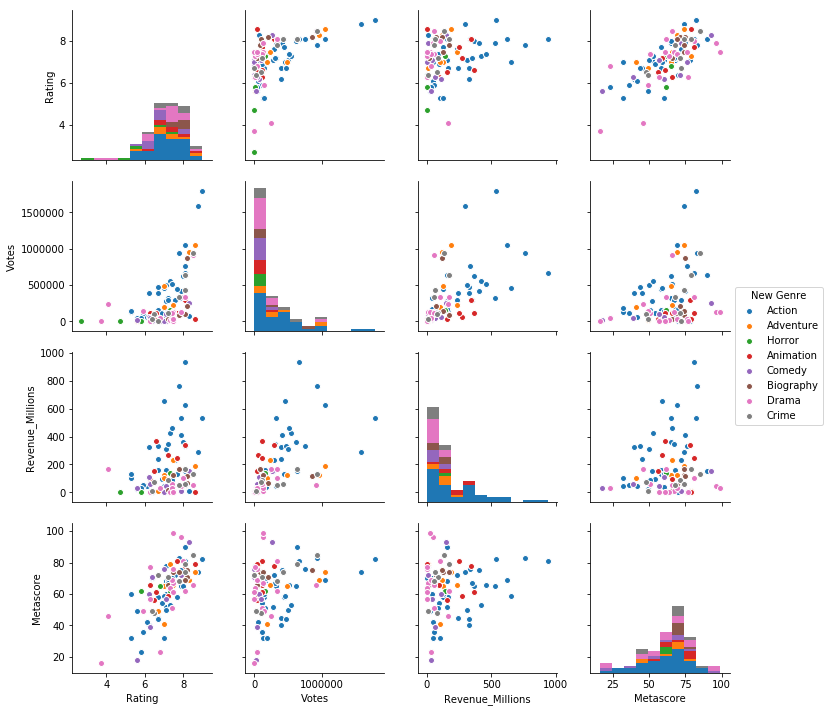

In [7]:
g = sns.pairplot(moviedf, hue="New Genre")

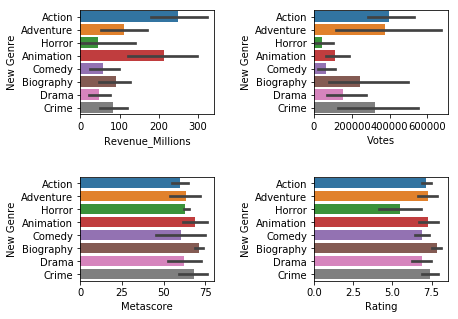

In [8]:
mpl.subplot(2, 2,1)
sns.barplot(x="Revenue_Millions", y="New Genre", data=moviedf)
mpl.subplot(2, 2,2)
sns.barplot(x="Votes", y="New Genre", data=moviedf)
mpl.subplot(2, 2,3)
sns.barplot(x="Metascore", y="New Genre", data=moviedf)
mpl.subplot(2, 2,4)
sns.barplot(x="Rating", y="New Genre", data=moviedf)
mpl.subplots_adjust(top=0.95, bottom=0.01, left=0.1, right=0.95, hspace=0.6,
                    wspace=0.75)

### Rating

C:\Users\Donal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


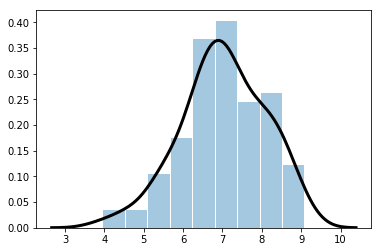

In [9]:
r = np.random.normal(7.086, 1.067, 100)
sns.distplot(r,hist_kws={"rwidth" :.95},kde_kws={"color": "k", "lw": 3,})

### Votes

In [10]:
mu, sigma = 179.,33. # mean and standard deviation
s = np.random.lognormal(179.,33., 100)
s

array([5.93519662e+102, 2.72057621e+076, 1.89859759e+072, 2.24663046e+091,
       8.31938801e+069, 2.05791272e+069, 2.27283935e+100, 9.30579308e+070,
       3.96949547e+074, 5.35244180e+090, 2.70012632e+082, 2.40622754e+082,
       3.26949661e+098, 9.10542428e+088, 7.24411179e+082, 1.14436667e+052,
       4.37919490e+082, 3.15259471e+072, 8.60712906e+073, 7.62490214e+080,
       2.14094314e+081, 1.33383278e+090, 1.01752620e+087, 3.12832783e+093,
       6.26130933e+052, 3.34362829e+086, 5.86103031e+044, 7.74962268e+077,
       8.34313662e+087, 3.83521484e+060, 5.79763318e+034, 1.48364199e+046,
       6.17793319e+095, 1.03265791e+083, 2.49964099e+077, 4.22409107e+079,
       3.60018924e+087, 7.91800389e+064, 7.13812701e+090, 2.09727946e+072,
       9.83510862e+092, 2.87834761e+073, 1.75993829e+082, 2.39472139e+093,
       5.44966307e+059, 2.60724872e+069, 1.32447512e+114, 2.82633855e+075,
       9.31624418e+071, 1.71595213e+084, 1.80418212e+045, 7.38213248e+092,
       2.29487685e+077, 4

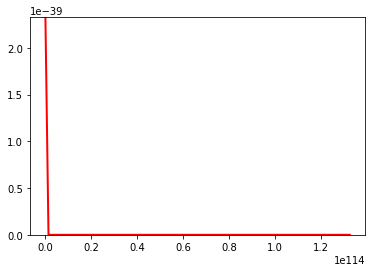

In [11]:
counts, bins, ignored = mpl.hist(s, 100, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 100)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))
mpl.plot(x, pdf, linewidth=2, color='r')
mpl.axis('tight')
mpl.show()

In [12]:
a, m = 3.,2. # shape and mode
s = (np.random.pareto(a, 100) + 1) * m

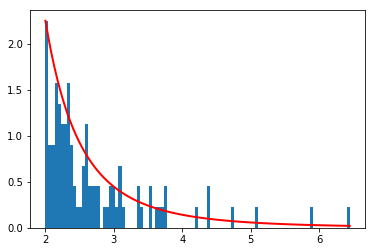

In [13]:
count, bins, _ = mpl.hist(s, 100, density=True)
fit = a*m**a / bins**(a+1)
mpl.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
mpl.show()

### Revenue

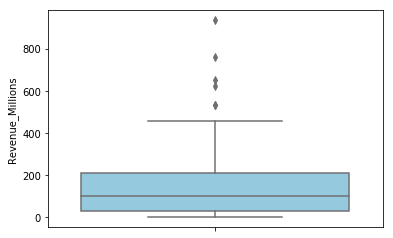

In [14]:
sns.boxplot(y="Revenue_Millions", data=moviedf,color="skyblue")

In [15]:
## https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr ##
q1 = moviedf['Revenue_Millions'].quantile(.25)
q3 = moviedf['Revenue_Millions'].quantile(.75)
mask = moviedf['Revenue_Millions'].between(q1, q3, inclusive=True)
iqr = moviedf.loc[mask, 'Revenue_Millions']

In [16]:
iqr.describe().round()

count     45.0
mean     101.0
std       47.0
min       32.0
25%       55.0
50%      100.0
75%      138.0
max      188.0
Name: Revenue_Millions, dtype: float64

C:\Users\Donal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


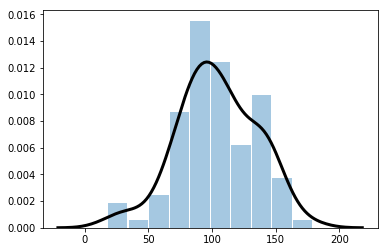

In [21]:
rev = np.random.normal(101,30, 100)
sns.distplot(rev,hist_kws={"rwidth" :.95},kde_kws={"color": "k", "lw": 3,})

### Metascore

C:\Users\Donal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


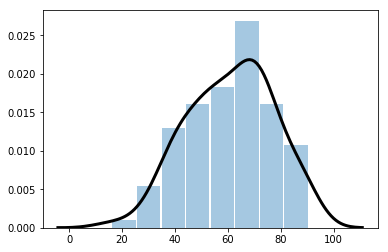

In [18]:
m = np.random.normal(62.95,16.4, 100)
sns.distplot(m,hist_kws={"rwidth" :.95},kde_kws={"color": "k", "lw": 3,})

## Create Dataframe using simulated data

In [69]:
SimData = pa.DataFrame({
           'Rating': r,
           'Votes': s,
           'Revenue': rev,
           'Metascore': m},
            columns = ['Rating','Votes','Revenue','Metascore'])

In [71]:
SimData.round(0)

,Rating,Votes,Revenue,Metascore
0,7.0,3.0,59.0,90.0
1,7.0,2.0,156.0,60.0
2,8.0,2.0,108.0,65.0
3,6.0,4.0,88.0,55.0
4,5.0,3.0,69.0,64.0
5,6.0,3.0,98.0,71.0
6,8.0,3.0,94.0,66.0
7,5.0,4.0,138.0,72.0
8,8.0,2.0,85.0,63.0
9,9.0,3.0,112.0,39.0


In [57]:
n = len(np.arange(100))
n

100

In [65]:
df32 = pa.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),
                 columns=['a', 'b', 'c', 'd', 'e'])
df32

,a,b,c,d,e
0,7,1,8,9,2
1,5,6,6,4,0
2,4,4,0,0,1
3,3,4,8,2,4
4,7,0,6,1,3


## Relationships

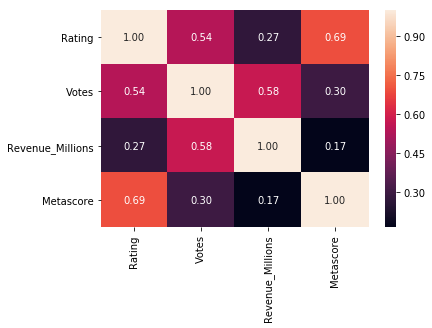

In [19]:
sns.heatmap(moviedf.corr(), annot=True, fmt=".2f")